In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
path = "/kdd-cup-99/kddcup.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df.tail()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Label
97544,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
97545,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
97546,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
97547,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
97548,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN


In [6]:
df.keys()

Index(['Duration', 'Protocol Type', 'Service', 'Flag', 'Source Bytes',
       'Destination Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot',
       'Number of Failed Logins', 'Logged In',
       'Number of Compromised Conditions', 'Root Shell', 'Su Attempted',
       'Number of Root', 'Number of File Creations', 'Number of Shell Prompts',
       'Number of Access Files', 'Number of Outbound Commands',
       'Is Host Login', 'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate',
       'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate',
       'Same Service Rate', 'Diff Service Rate', 'Srv Diff Host Rate',
       'Dst Host Count', 'Dst Host Srv Count', 'Dst Host Same Srv Rate',
       'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate',
       'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate',
       'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate',
       'Dst Host Srv Rerror Rate', 'Label'],
      dtype='object')

In [7]:
df['Label'].nunique()

6

In [8]:
df['Label'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', nan], dtype=object)

In [9]:
df.dropna(subset=['Label'], inplace=True)

In [10]:
df['Label'].value_counts()

Label
normal.             77888
smurf.              19641
neptune.               15
buffer_overflow.        2
loadmodule.             1
perl.                   1
Name: count, dtype: int64

In [11]:
df['Protocol Type'].value_counts()   

Protocol Type
tcp     76235
icmp    19891
udp      1422
Name: count, dtype: int64

In [12]:
label_encoder = LabelEncoder()
df['Protocol Type'] = label_encoder.fit_transform(df['Protocol Type'])
df['Service'] = label_encoder.fit_transform(df['Service'])
df['Flag'] = label_encoder.fit_transform(df['Flag'])

In [13]:
label_mapping = {
    'normal.': 0,
    'buffer_overflow.': 1,
    'loadmodule.': 1,
    'perl.': 1,
    'neptune.': 1,
    'smurf.': 1}

In [14]:
df['Label'] = df['Label'].map(label_mapping)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97548 entries, 0 to 97547
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Duration                          97548 non-null  int64  
 1   Protocol Type                     97548 non-null  int64  
 2   Service                           97548 non-null  int64  
 3   Flag                              97548 non-null  int64  
 4   Source Bytes                      97548 non-null  int64  
 5   Destination Bytes                 97548 non-null  int64  
 6   Land                              97548 non-null  int64  
 7   Wrong Fragment                    97548 non-null  int64  
 8   Urgent                            97548 non-null  int64  
 9   Hot                               97548 non-null  int64  
 10  Number of Failed Logins           97548 non-null  int64  
 11  Logged In                         97548 non-null  int64  
 12  Number of

In [16]:
df.describe()

,Duration,Protocol Type,Service,Flag,Source Bytes,Destination Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Srv Diff Host Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,Label
count,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000,97548.0,97548.0,97548.000000,97548.000000,...,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000,97548.000000
mean,3.425022,0.810668,5.489298,6.992763,503.013624,3324.954197,0.0,0.0,0.000010,0.035101,...,240.817515,0.978289,0.004938,0.254882,0.018190,0.001102,0.000442,0.000804,0.000799,0.201542
std,218.695920,0.427367,1.590732,0.191007,740.012350,8093.408787,0.0,0.0,0.003202,0.793475,...,48.124404,0.110804,0.031580,0.402996,0.030088,0.018785,0.014236,0.027927,0.028001,0.401154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,6.000000,7.000000,221.000000,278.000000,0.0,0.0,0.000000,0.000000,...,255.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,6.000000,7.000000,290.000000,924.000000,0.0,0.0,0.000000,0.000000,...,255.000000,1.000000,0.000000,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,6.000000,7.000000,871.000000,2808.000000,0.0,0.0,0.000000,0.000000,...,255.000000,1.000000,0.000000,0.250000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40504.000000,2.000000,11.000000,7.000000,49765.000000,271733.000000,0.0,0.0,1.000000,30.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.940000,1.000000,1.000000,1.000000


In [17]:
df.shape

(97548, 42)

In [18]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

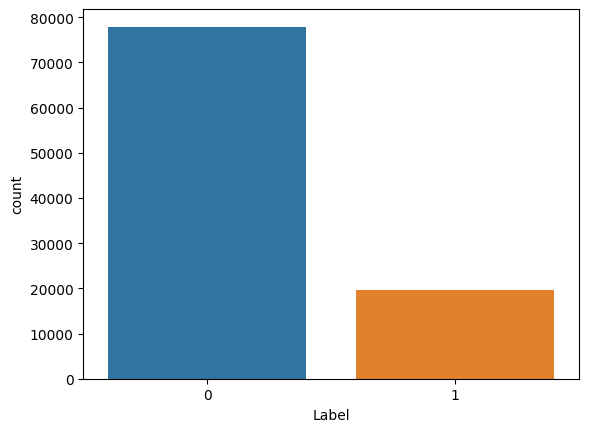

In [19]:
sns.countplot(x='Label', data=df)
plt.show()

Ensemble Machine Learning algorithm

In [20]:
predictorNames = ['Duration', 'Protocol Type', 'Service', 'Flag', 'Source Bytes',
       'Destination Bytes', 'Land', 'Wrong Fragment', 'Urgent', 'Hot',
       'Number of Failed Logins', 'Logged In',
       'Number of Compromised Conditions', 'Root Shell', 'Su Attempted',
       'Number of Root', 'Number of File Creations', 'Number of Shell Prompts',
       'Number of Access Files', 'Number of Outbound Commands',
       'Is Host Login', 'Is Guest Login', 'Count', 'Srv Count', 'Serror Rate',
       'Srv Serror Rate', 'Rerror Rate', 'Srv Rerror Rate',
       'Same Service Rate', 'Diff Service Rate', 'Srv Diff Host Rate',
       'Dst Host Count', 'Dst Host Srv Count', 'Dst Host Same Srv Rate',
       'Dst Host Diff Srv Rate', 'Dst Host Same Src Port Rate',
       'Dst Host Srv Diff Host Rate', 'Dst Host Serror Rate',
       'Dst Host Srv Serror Rate', 'Dst Host Rerror Rate',
       'Dst Host Srv Rerror Rate']

In [21]:
predictors = df[predictorNames]

In [22]:
response = df['Label']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size=0.2, random_state=42)

# Bootstrap Aggregation #

In [24]:
template = DecisionTreeClassifier(max_depth=5)

In [25]:
classificationEnsemble = AdaBoostClassifier(estimator=template,
                                             n_estimators=100,
                                             learning_rate=0.1)

In [26]:
classificationEnsemble.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.1, n_estimators=100)

In [27]:
y_pred1 = classificationEnsemble.predict(X_test)

In [28]:
Accuracy1 = accuracy_score(y_test, y_pred1)
recall1 = recall_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1)
f11 = f1_score(y_test, y_pred1)
mcc1 = matthews_corrcoef(y_test, y_pred1)

In [29]:
print("KDDCUP99 Dataset Boasting")
print('Accuracy:', Accuracy1*100)
print('Recall:', recall1*100)
print('Precision:', precision1*100)
print('F1 Score:', f11*100)
print('MCC Score:', mcc1*100)

KDDCUP99 Dataset Boasting
Accuracy: 99.97949769349052
Recall: 99.92103185048697
Precision: 99.97366341848829
F1 Score: 99.94734070563455
MCC Score: 99.93461692355619


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


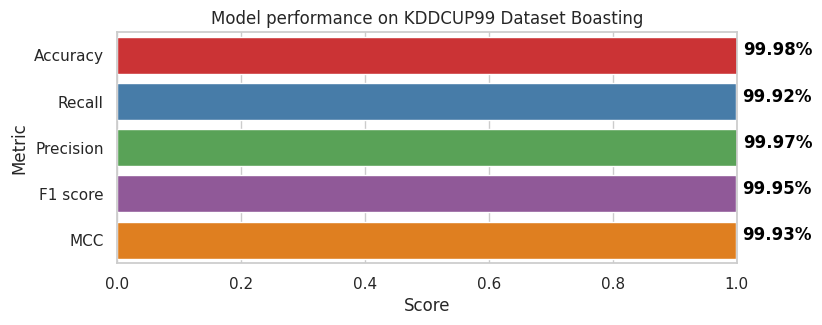

In [30]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', "MCC"]
scores = [Accuracy1,recall1, precision1,f11, mcc1]
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v+0.01, i, f'{v*100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('Model performance on KDDCUP99 Dataset Boasting')

plt.show()

In [31]:
cm = confusion_matrix(y_test, y_pred1)

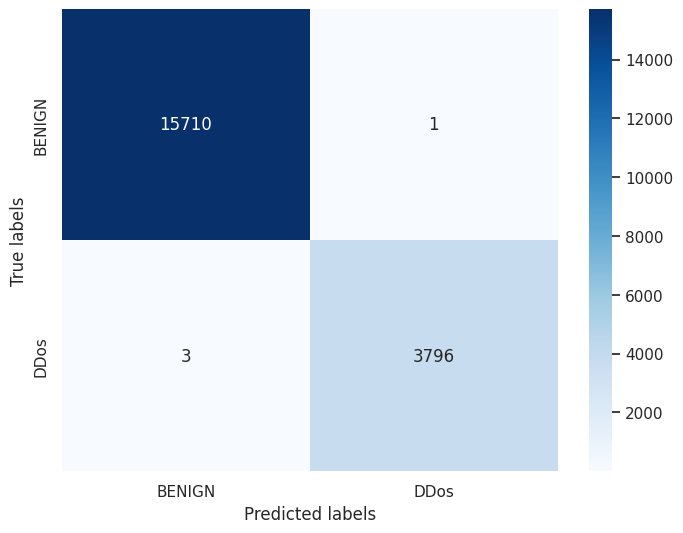

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Bagging #

In [33]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5)

In [34]:
bagging = BaggingClassifier(estimator=rfc, n_estimators=100, max_samples=0.8, max_features=0.8)

In [35]:
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(max_depth=5),
                  max_features=0.8, max_samples=0.8, n_estimators=100)

In [36]:
y_pred2 =bagging.predict(X_test)

In [37]:
Accuracy2 = accuracy_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
mcc2 = matthews_corrcoef(y_test, y_pred2)

In [38]:
print("KDDCUP99 Dataset Bagging")
print('Accuracy:', Accuracy2*100)
print('Recall:', recall2*100)
print('Precision:', precision2*100)
print('F1 Score:', f12*100)
print('MCC Score:', mcc2*100)

KDDCUP99 Dataset Bagging
Accuracy: 99.97949769349052
Recall: 99.89470913398263
Precision: 100.0
F1 Score: 99.94732683697657
MCC Score: 99.93461990000935


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


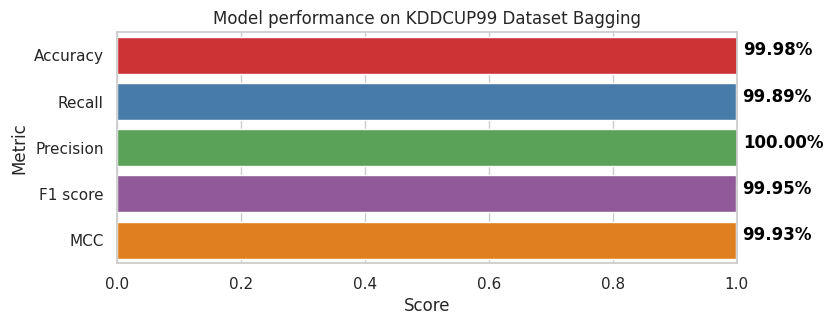

In [39]:
labels = ['Accuracy', 'Recall', 'Precision', 'F1 score', 'MCC']
scores = [Accuracy2,recall2, precision2,f12, mcc2]
sns.set(style='whitegrid')
sns.set_color_codes('pastel')
palette = sns.color_palette('Set1')

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=scores, y=labels, palette=palette)

for i, v in enumerate(scores):
    ax.text(v+0.01, i, f'{v*100:.2f}%', color='black', fontweight='bold')

ax.set_xlim(0, 1)
ax.set_xlabel('Score')
ax.set_ylabel('Metric')
ax.set_title('Model performance on KDDCUP99 Dataset Bagging')

plt.show()

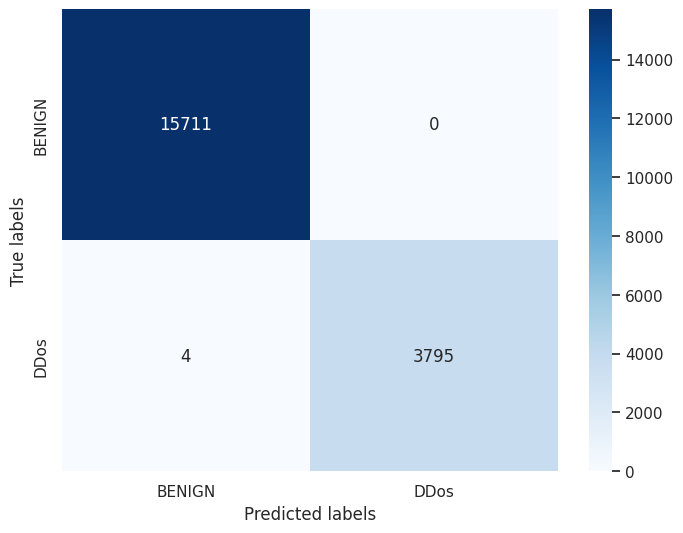

In [40]:
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8,6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['BENIGN', 'DDos'], yticklabels=['BENIGN', 'DDos'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()